# Práctica 1.1: MÉTODOS AVANZADOS DE PREPROCESADO DE IMAGEN MÉDICA (filtrado NLM)

## Adición de ruido

En esta sección vamos a proceder a añadir ruido a las imágenes que hemos obtenido del repositorio de bases de datos Open Neuro, para poder evaluar los resultados de filtrado que debemos realizar. \n

En primer lugar, cargaremos las imágenes con las que testearemos nuestro código. Se trata de imágenes de fMRI.

In [65]:
import os
import numpy as np
import nibabel as nib
import matplotlib 
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
import modules
from nilearn import plotting


In [6]:
img = nib.load(r'\Users\Maria\Desktop\data\sub-01\anat\sub-01_T1w.nii.gz')
img2 = nib.load(r'\Users\Maria\Desktop\data\sub-17\anat\sub-17_T1w.nii.gz')

In [7]:
img.affine

array([[ 9.96775329e-01, -1.48763147e-03, -8.02301541e-02,
        -8.26823959e+01],
       [-2.98805232e-03,  9.98446643e-01, -5.56366481e-02,
        -1.06932190e+02],
       [ 8.01882967e-02,  5.56969717e-02,  9.95222449e-01,
        -1.48407990e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [8]:
print (img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (176, 256, 256)
affine: 
[[ 9.96775329e-01 -1.48763147e-03 -8.02301541e-02 -8.26823959e+01]
 [-2.98805232e-03  9.98446643e-01 -5.56366481e-02 -1.06932190e+02]
 [ 8.01882967e-02  5.56969717e-02  9.95222449e-01 -1.48407990e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.4 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice

Vamos a estudiar algunas características de los datos que hemos cargado, además de mostrarlos por pantalla.

In [9]:
data = img.get_fdata()

In [10]:
print(data.shape)

(176, 256, 256)


In [11]:
print(data.dtype, img.get_data_dtype())

float64 float32


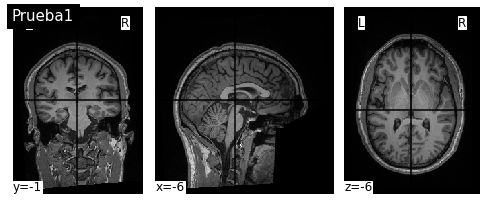

In [12]:
plotting.plot_img(img, title="Prueba1",display_mode='ortho',cmap=plt.cm.gray )
plotting.show()                

Para poder añadirle el ruido a las imágenes, vamos a transformar los datos al formato array, y tras ello guardaremos un único corte (que hemos elegido de manera aleatoria) al que realizaremos la adición. "

In [13]:
a = np.array(skimage.transform.rescale(img.dataobj,0.5))

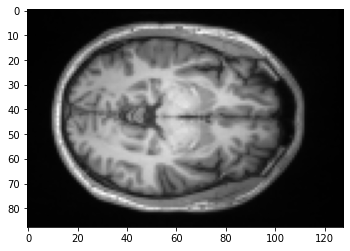

In [14]:
img_gray= a[:,:,60]
#normalizo la imagen
img_o=img_gray
img_o=img_o/np.max(img_o)
plt.imshow(img_gray, cmap=plt.cm.gray)

Llamando a la función .add_gnoise() y la función .salpimienta del módulo modules.py que hemos creado, conseguimos añadir ruido gaussiano e impulsivo a la imagen. Llamando a la función .add_gnoise() y la función .salpimienta del módulo modules.py que hemos creado, conseguimos añadir ruido gaussiano e impulsivo a la imagen. 

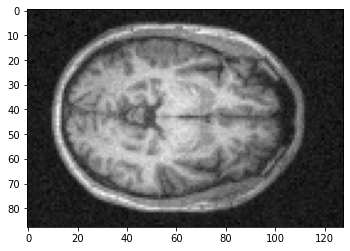

In [15]:
#Aplicar ruido gaussiano
img_gauss=modules.add_gnoise('gauss',img_o,0.03)
plt.imshow(img_gauss, cmap=plt.cm.gray)

C:\Users\Maria\Desktop\Universidad\Analisis_Imagen\Practica1\Analisis-main\Analisis\modules.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ruido_output[pos]=1
C:\Users\Maria\Desktop\Universidad\Analisis_Imagen\Practica1\Analisis-main\Analisis\modules.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ruido_output[pos]=0


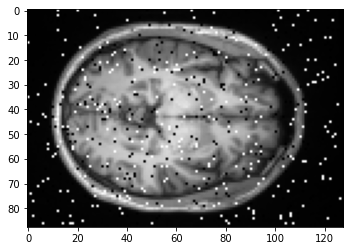

In [16]:
#Aplicar ruido impulsivo
img_salpimienta=modules.salpimienta('s&p',img_o,0.05)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)

## Filtrado Non-Local Means

(Text(0.5, 1.0, 'Mean filtered image'), (-0.5, 127.5, 87.5, -0.5))

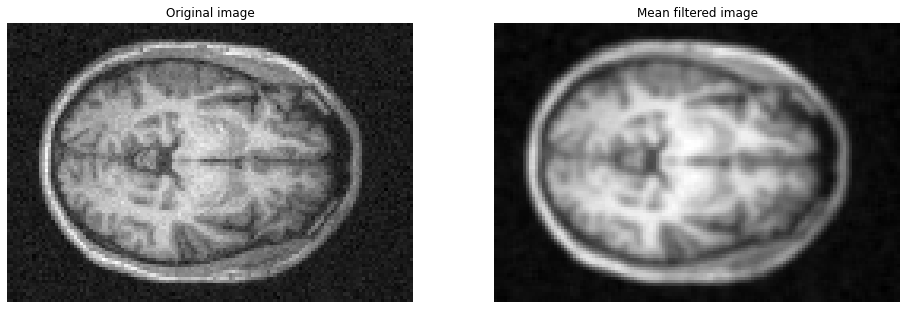

In [17]:
img_meanfiltered = modules.mean_filter(img_gauss)
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_meanfiltered, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Mean filtered image'), (-0.5, 127.5, 87.5, -0.5))

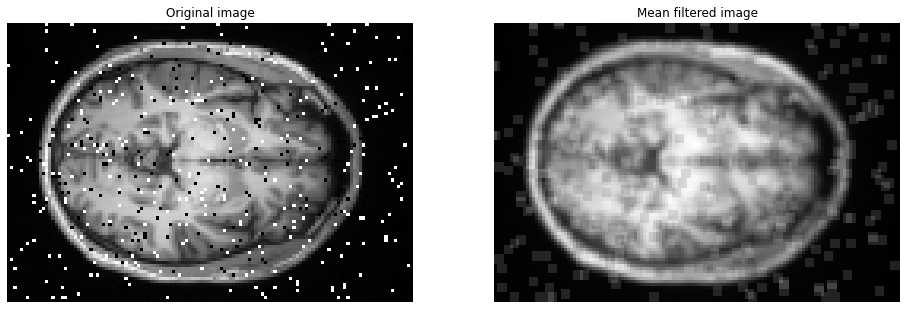

In [18]:
img_meanfiltered = modules.mean_filter(img_salpimienta)
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_meanfiltered, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Median filtered image'), (-0.5, 127.5, 87.5, -0.5))

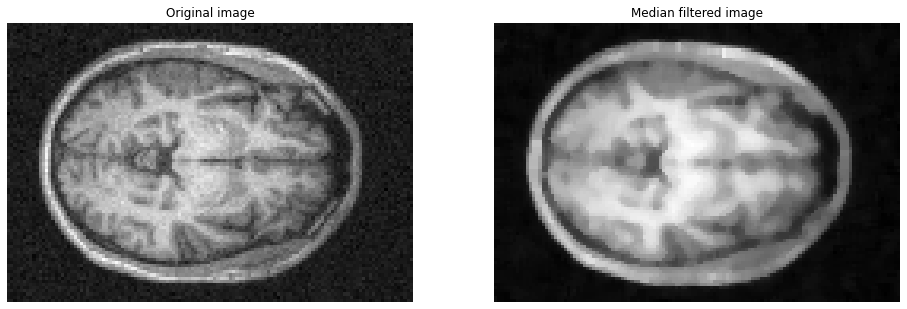

In [19]:
img_medianfiltered = modules.median_filter(img_gauss, 4)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_medianfiltered, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Median filtered image'), (-0.5, 127.5, 87.5, -0.5))

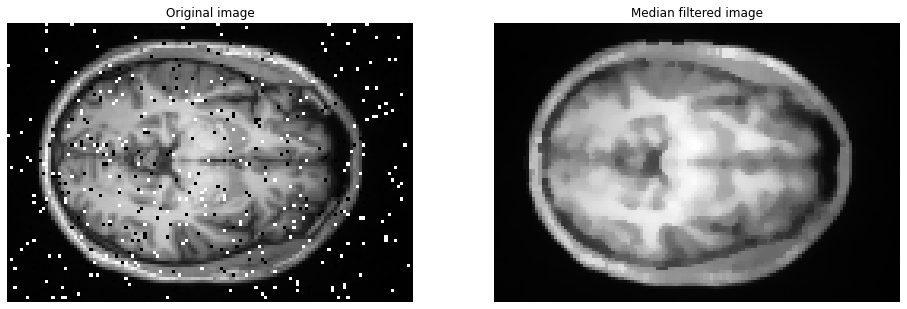

In [20]:
img_medianfiltered = modules.median_filter(img_salpimienta, 4)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_medianfiltered, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 127.5, 87.5, -0.5))

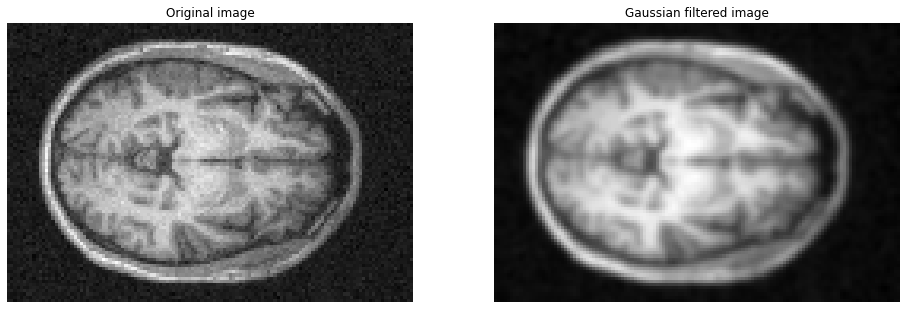

In [21]:
img_gaussianfiltered = modules.gaussian_filter(img_gauss,1)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_gaussianfiltered, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 127.5, 87.5, -0.5))

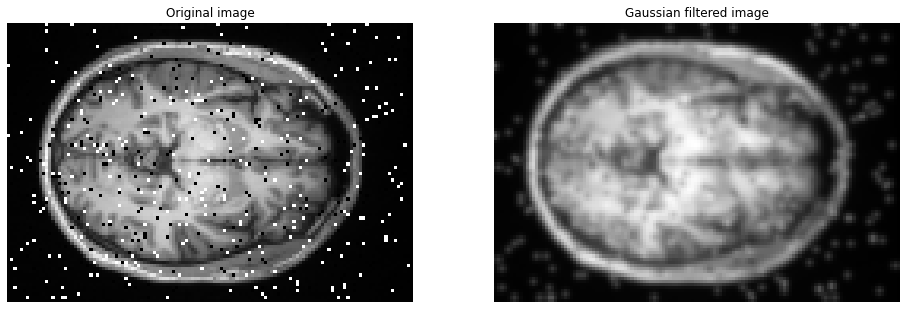

In [22]:
img_gaussianfiltered = modules.gaussian_filter(img_salpimienta,1)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_gaussianfiltered, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')

In [23]:
#parameters

matriz_imagen = modules.nlm(img_gauss, 1)




ValueError: setting an array element with a sequence.

NameError: name 'matriz_imagen' is not defined

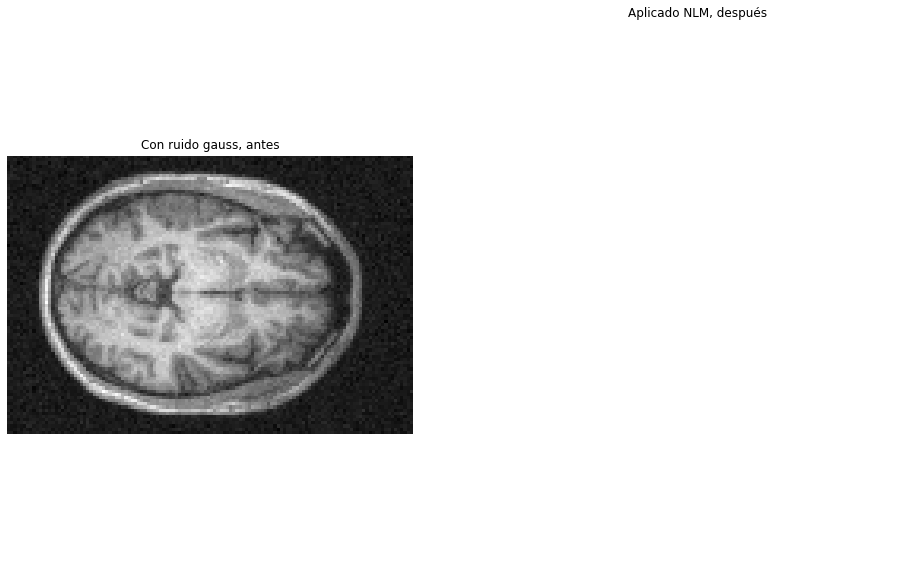

In [27]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado NLM, después'), plt.axis('off')
plt.imshow(matriz_imagen, cmap=plt.cm.gray)

In [28]:
#aplicamos filtro de sobel

In [36]:
img_sobel=filters.sobel(img_gauss)

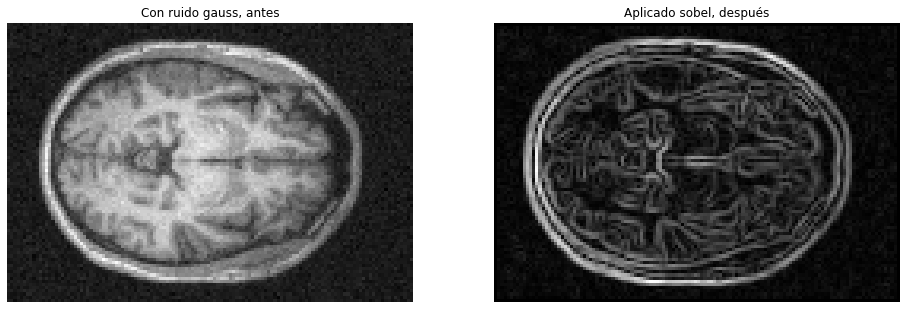

In [37]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado sobel, después'), plt.axis('off')
plt.imshow(img_sobel,cmap=plt.cm.gray)

In [38]:
w= np.zeros(shape=(img.shape[0],img.shape[1]))

In [ ]:
img=np.pad(img_sobel, 1, mode='reflect')

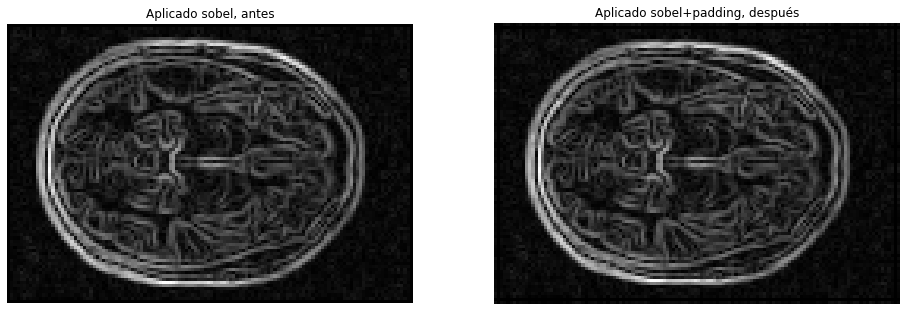

In [43]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_sobel,cmap=plt.cm.gray)
plt.title('Aplicado sobel, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado sobel+padding, después'), plt.axis('off')
plt.imshow(img,cmap=plt.cm.gray)

In [75]:
row,col = img.shape
cont=0
while cont<50:

    cont=cont+1
   
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):

            parche = np.array([[img[i-1,j-1],img[i-1,j],img[i-1,j+1]], 
                                [img[i,j-1],img[i,j],img[i,j+1]], 
                                [img[i+1,j-1],img[i+1,j],img[i+1,j+1]]])

            gradiente= np.sum(parche)
                
            if gradiente<10:
                w[i-1, j-1]=modules.gaussian_filter(parche,0.5)
                
                
            else:
                pass


ValueError: setting an array element with a sequence.

In [72]:
#img_aniso=modules.anisdiff(img_sobel,50)

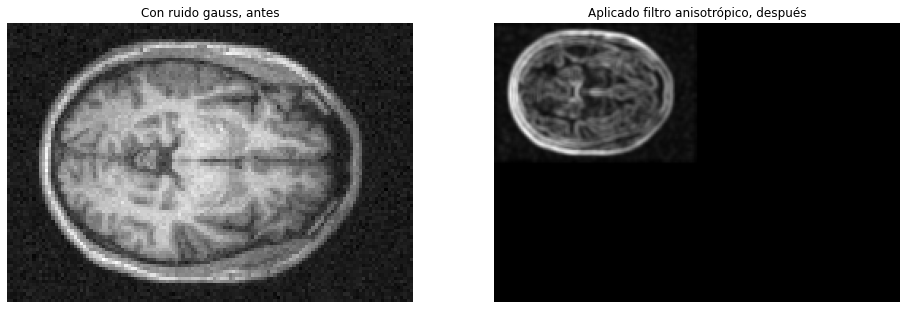

In [74]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado filtro anisotrópico, después'), plt.axis('off')
plt.imshow(w,cmap=plt.cm.gray)

In [52]:
def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),option=1,plot_flag=False):
        """
        Anisotropic diffusion.
 
        Usage:
        imgout = anisodiff(im, niter, kappa, gamma, option)
 
        Arguments:
                img    - input image
                niter  - number of iterations
                kappa  - conduction coefficient 20-100 ?
                gamma  - max value of .25 for stability
                step   - tuple, the distance between adjacent pixels in (y,x)
                option - 1 Perona Malik diffusion equation No 1
                         2 Perona Malik diffusion equation No 2
                plot_flag - if True, the image will be plotted
 
        Returns:
                imgout   - diffused image.
 
        kappa controls conduction as a function of gradient.  If kappa is low
        small intensity gradients are able to block conduction and hence diffusion
        across step edges.  A large value reduces the influence of intensity
        gradients on conduction.
 
        gamma controls speed of diffusion (you usually want it at a maximum of
        0.25)
 
        step is used to scale the gradients in case the spacing between adjacent
        pixels differs in the x and y axes
 
        Diffusion equation 1 favours high contrast edges over low contrast ones.
        Diffusion equation 2 favours wide regions over smaller ones.
 
        Reference:
        P. Perona and J. Malik.
        Scale-space and edge detection using ansotropic diffusion.
        IEEE Transactions on Pattern Analysis and Machine Intelligence,
        12(7):629-639, July 1990.
 
        Original MATLAB code by Peter Kovesi  
        School of Computer Science & Software Engineering
        The University of Western Australia
        pk @ csse uwa edu au
        <http://www.csse.uwa.edu.au>
 
        Translated to Python and optimised by Alistair Muldal
        Department of Pharmacology
        University of Oxford
        <alistair.muldal@pharm.ox.ac.uk>
 
        June 2000  original version.      
        March 2002 corrected diffusion eqn No 2.
        July 2012 translated to Python
        """
 
        # initialize output array
        img = img.astype('float64')
        imgout = img.copy()
 
        # initialize some internal variables
        deltaS = np.zeros_like(imgout)
        deltaE = deltaS.copy()
        NS = deltaS.copy()
        EW = deltaS.copy()
        gS = np.ones_like(imgout)
        gE = gS.copy()    
 
        for ii in range(niter):
 
                # calculate the diffs
                deltaS[:-1,: ] = np.diff(imgout,axis=0)
                deltaE[: ,:-1] = np.diff(imgout,axis=1)
 
                # conduction gradients (only need to compute one per dim!)
                if option == 1:
                        gS = np.exp(-(deltaS/kappa)**2.)/step[0]
                        gE = np.exp(-(deltaE/kappa)**2.)/step[1]
                elif option == 2:
                        gS = 1./(1.+(deltaS/kappa)**2.)/step[0]
                        gE = 1./(1.+(deltaE/kappa)**2.)/step[1]
 
                # update matrices
                E = gE*deltaE
                S = gS*deltaS
 
                # subtract a copy that has been shifted 'North/West' by one
                # pixel. don't as questions. just do it. trust me.
                NS[:] = S
                EW[:] = E
                NS[1:,:] -= S[:-1,:]
                EW[:,1:] -= E[:,:-1]
 
                # update the image
                imgout += gamma*(NS+EW)
 
                               
        if plot_flag:
             # create the plot figure, if requested
            plt.figure(figsize=(12, 5))
            plt.subplot(121)
            plt.imshow(img, cmap=plt.cm.gray)
            plt.title('Original image'), plt.axis('off')
            plt.subplot(122)
            plt.imshow(imgout, cmap=plt.cm.gray)
            plt.title('Filtered image (Anisotropic Diffusion)'), plt.axis('off')
 
        return imgout

In [56]:
aniso= anisodiff(img_gauss)

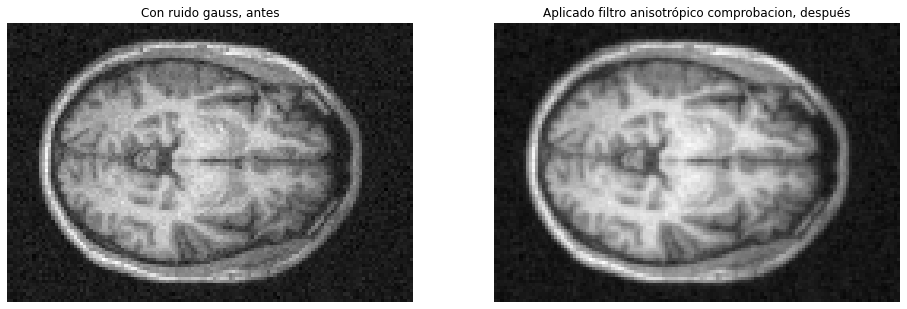

In [57]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado filtro anisotrópico comprobacion, después'), plt.axis('off')
plt.imshow(aniso,cmap=plt.cm.gray)